In [3]:
import importlib
import lecar
import arc
import phase_changes

importlib.reload(lecar)
importlib.reload(arc)
importlib.reload(phase_changes)

<module 'phase_changes' from '/Users/aditya/Documents/lecar-arc/phase_changes.py'>

In [4]:
from phase_changes import phase_changes_dataset
from lecar import LeCaR
from arc import ARC
CACHE_SIZE = 50 # set in the paper for testing phase changes

phase_changes_requests = phase_changes_dataset()
lecar_hit_rate, arc_hit_rate = [],[]
lecar_hits, arc_hits = 0, 0
assert len(phase_changes_requests) == 25000
NUM_REQUESTS = len(phase_changes_requests)
lecar_cache = LeCaR(CACHE_SIZE)
arc_cache = ARC(CACHE_SIZE)
for i in range(NUM_REQUESTS):
    requested_page = phase_changes_requests[i]
    lecar_found = lecar_cache.request(requested_page)
    if lecar_found: lecar_hits += 1
    lecar_hit_rate.append(lecar_hits / (i+1))

    arc_found = arc_cache.request(requested_page)
    if arc_found: arc_hits += 1
    arc_hit_rate.append(arc_hits / (i+1))

print(f"Final Hit Rate for LeCaR for 25k requests with phase changes: {lecar_hit_rate[-1]}")
print(f"Final Hit Rate for ARC for 25k requests with phase changes: {arc_hit_rate[-1]}")

Final Hit Rate for LeCaR for 25k requests with phase changes: 0.89312
Final Hit Rate for ARC for 25k requests with phase changes: 0.89488


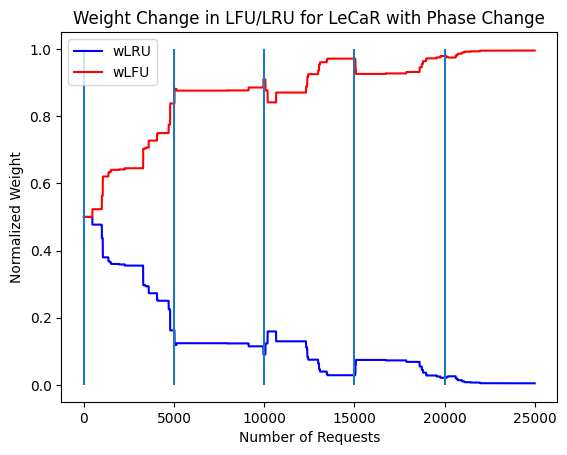

In [6]:
import matplotlib.pyplot as plt
import numpy as np

weight_collections = lecar_cache.weights_collection
weight_collections_arr = np.array(weight_collections)
lru_weights = weight_collections_arr[:, 0]
lfu_weights = weight_collections_arr[:, 1]
num_requests = np.array(list(range(1, NUM_REQUESTS+1)))

plt.title("Weight Change in LFU/LRU for LeCaR with Phase Change")
plt.plot(num_requests, lru_weights, color="blue", label="wLRU")
plt.plot(num_requests, lfu_weights, color="red", label="wLFU")
plt.xlabel("Number of Requests")
plt.ylabel("Normalized Weight")
plt.vlines([0,5000,10000,15000,20000], ymin=0.0, ymax=1.0)
plt.legend()
plt.show()

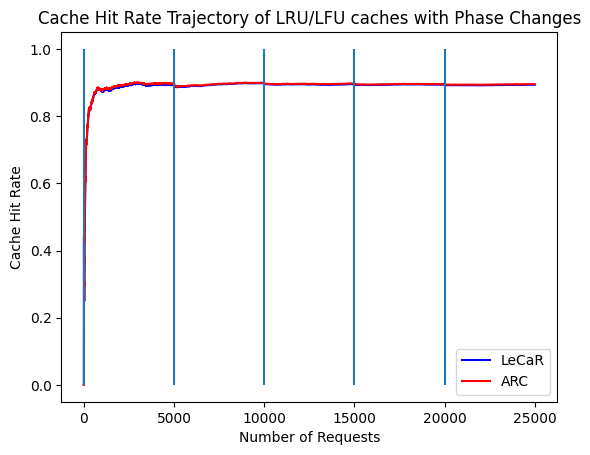

In [23]:
plt.title("Cache Hit Rate Trajectory of LRU/LFU caches with Phase Changes")
plt.xlabel("Number of Requests")
plt.ylabel("Cache Hit Rate")

assert len(num_requests) == len(lecar_hit_rate)
plt.plot(num_requests, lecar_hit_rate, color="blue", label="LeCaR")
plt.plot(num_requests, arc_hit_rate, color="red", label="ARC")
plt.legend()
plt.vlines([0,5000,10000,15000,20000], ymin=0.0, ymax=1.0)
plt.show()